In [20]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

## 2 Dimension

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


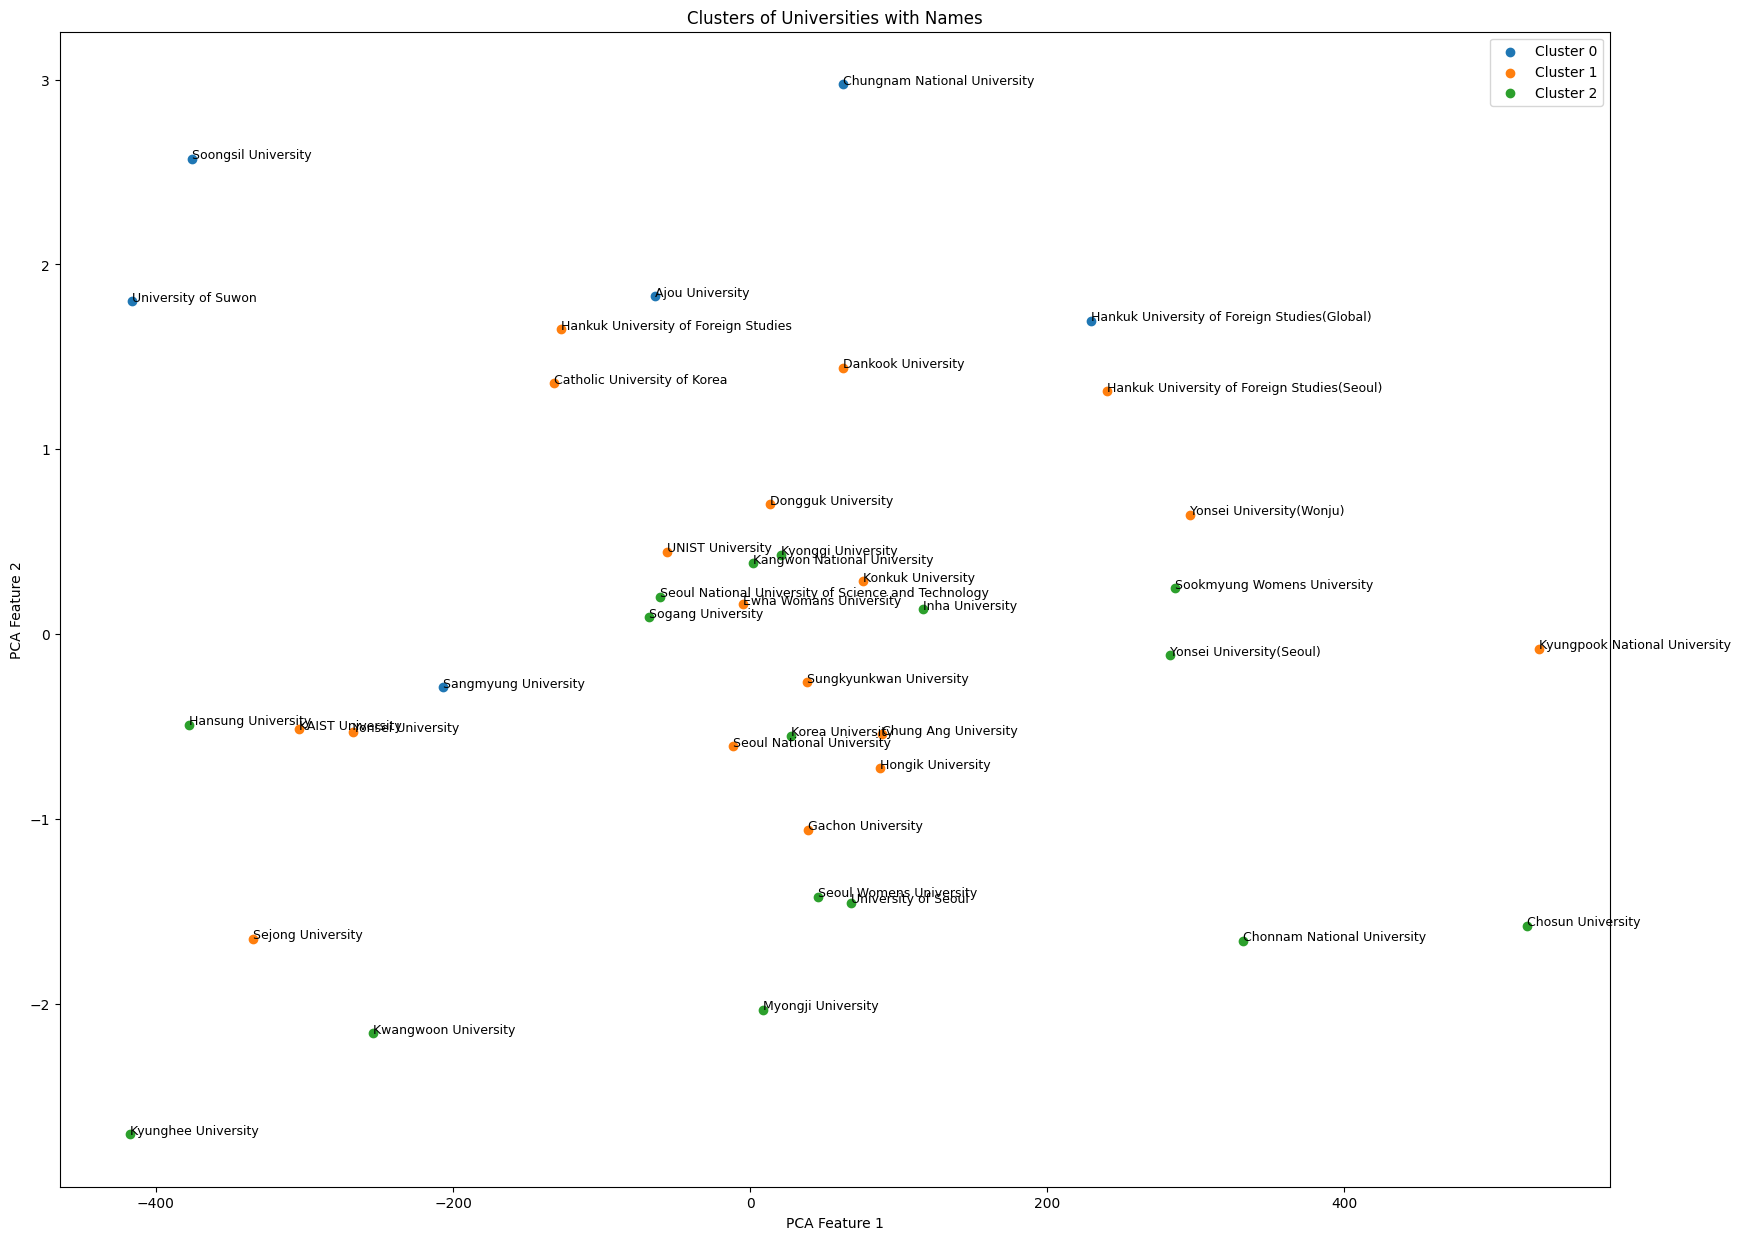

In [21]:
# 데이터 로드
df = pd.read_excel('/content/drive/MyDrive/Colab Notebooks/Social_Pitch_Data.xlsx')

# 대학 이름을 저장
university_names = df.iloc[:, 2]

# 정규화를 위한 준비: ID, Year, University Name을 제외
scaler = StandardScaler()
df_numeric = df.drop(columns=df.columns[0:3])  # ID, Year, University Name을 제외
df_normalized = scaler.fit_transform(df_numeric)

# KMeans 클러스터링 실행
kmeans = KMeans(n_clusters=3, random_state=42)
clusters = kmeans.fit_predict(df_normalized)
df['Cluster'] = clusters

# 대학 이름별로 클러스터 레이블의 최빈값을 구함
df_cluster_mode = df.groupby('University Name English')['Cluster'].agg(lambda x: x.mode()[0]).reset_index()

# 수치 데이터의 평균을 계산하고, 대학 이름별로 최빈 클러스터 레이블을 병합
df_grouped = df.groupby('University Name English').mean().reset_index()
df_grouped = df_grouped.merge(df_cluster_mode, on='University Name English', how='left', suffixes=('', '_mode'))

# PCA를 실행
pca = PCA(n_components=2)
pca_result = pca.fit_transform(df_grouped.drop(columns=['University Name English', 'Cluster', 'Cluster_mode'], axis=1))
df_grouped['PCA1'] = pca_result[:, 0]
df_grouped['PCA2'] = pca_result[:, 1]

# 시각화
plt.figure(figsize=(20, 15))
for cluster in df_grouped['Cluster_mode'].unique():
    cluster_data = df_grouped[df_grouped['Cluster_mode'] == cluster]
    plt.scatter(cluster_data['PCA1'], cluster_data['PCA2'], label=f'Cluster {cluster}')
    for i, txt in enumerate(cluster_data['University Name English']):
        plt.annotate(txt, (cluster_data['PCA1'].iloc[i], cluster_data['PCA2'].iloc[i]), fontsize=9)

plt.title('Clusters of Universities with Names')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


### 각 cluster 마다 어떤 단어들이 공통점으로 묶였을까?

In [22]:
# KMeans 모델의 클러스터 중심점을 변수로 지정
cluster_centers = kmeans.cluster_centers_

# 각 클러스터 중심점에 대해 영향력이 큰 특성(단어)의 인덱스를 얻음
top_features_per_cluster = [center.argsort()[-5:][::-1] for center in cluster_centers]

# 각 클러스터에 대한 상위 5개 특성(단어)의 이름을 print
for num, centroid in enumerate(top_features_per_cluster):
    print(f"Cluster {num} Top Words: {df_numeric.columns[centroid].tolist()}")

Cluster 0 Top Words: ['WB: Direction', 'WB: Identity', 'WB: Motivation', 'WB: Social Connections', 'WB: Purpose']
Cluster 1 Top Words: ['WB: Significance', 'WB: Meaning', 'WB: Purpose', 'WB: Means', 'WB: Motivation']
Cluster 2 Top Words: ['Leisure', 'Home', 'Money', 'All-or-none', 'Causation']


### cluster
0: 앞으로의 방향성, 동기부여, 목적  
1: 현재의 의미, 중요성, 동기부여  
2: 여가, 집, 돈과 같은 라이프스타일  

각 군집별로 중요하게 생각하는 컨셉의 단어들이 묶임을 볼 수 있음.  

## 3 Dimension
### 공간상으로 표현하면 어떻게 보일까?

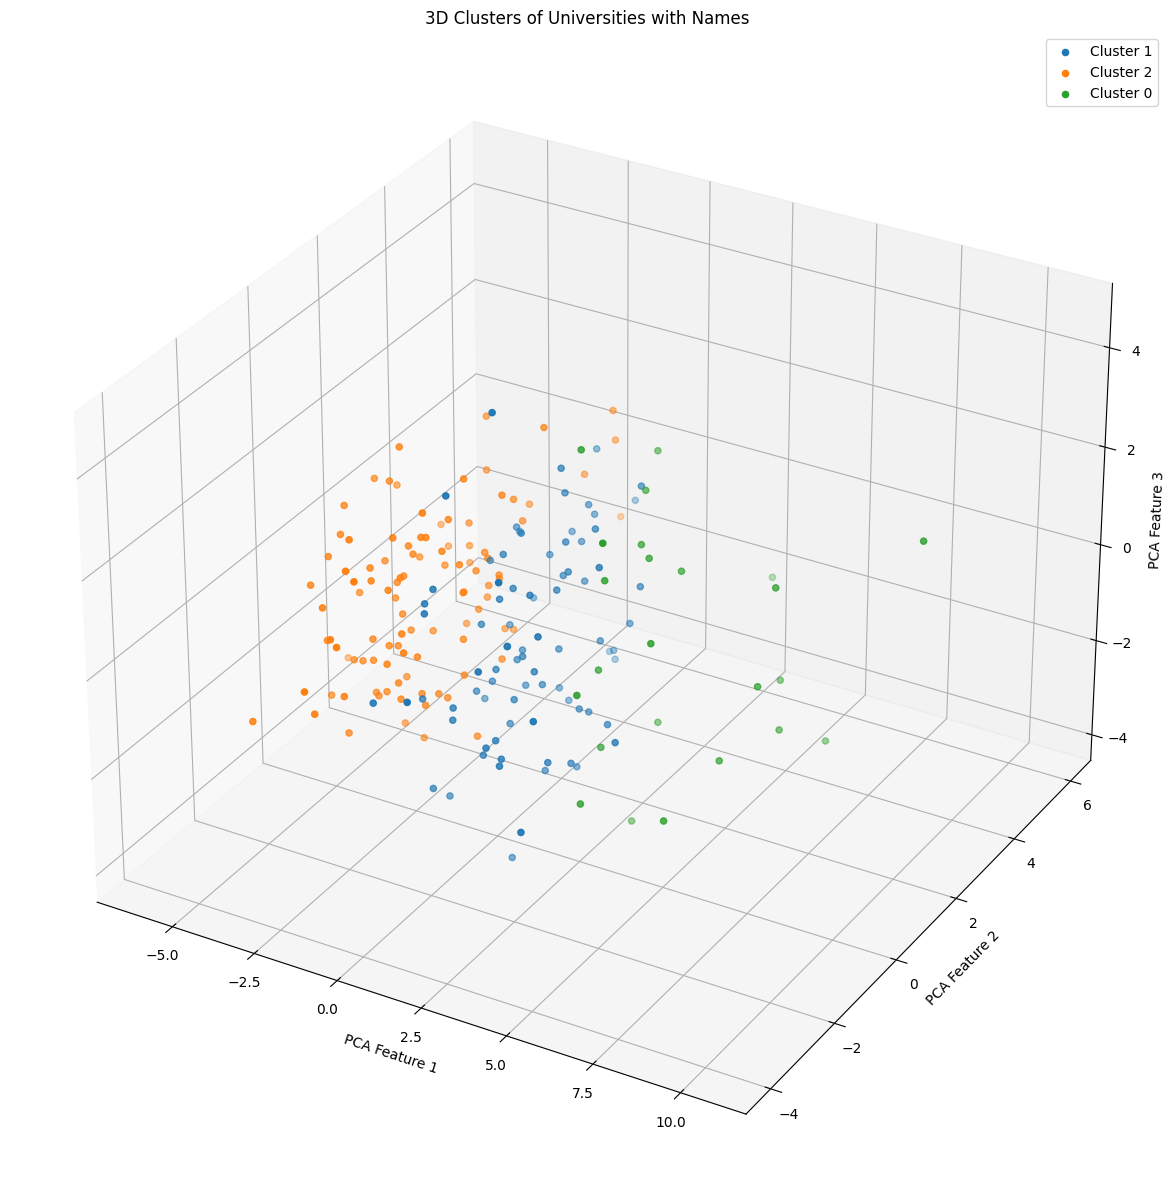

In [23]:
from mpl_toolkits.mplot3d import Axes3D  # 3D 플로팅을 위한 모듈

# 데이터 로드 및 정규화, 클러스터링 등의 전처리 과정은 동일하게 유지

# PCA를 사용하여 3차원으로 차원 축소를 수행합니다.
pca = PCA(n_components=3)  # n_components를 3으로 설정
pca_result = pca.fit_transform(df_normalized)

# 결과를 새로운 데이터 프레임 열에 추가합니다.
df['PCA1'] = pca_result[:, 0]
df['PCA2'] = pca_result[:, 1]
df['PCA3'] = pca_result[:, 2]

# 3D 산점도를 위한 준비
fig = plt.figure(figsize=(20, 15))
ax = fig.add_subplot(111, projection='3d')  # 3D 플롯을 생성

# 각 클러스터에 대한 3D 산점도 그리기
for cluster in df['Cluster'].unique():
    cluster_data = df[df['Cluster'] == cluster]
    ax.scatter(cluster_data['PCA1'], cluster_data['PCA2'], cluster_data['PCA3'], label=f'Cluster {cluster}')
    # 대학명을 표시
    #for i, txt in enumerate(cluster_data['University Name English']):
        #ax.text(cluster_data['PCA1'].iloc[i], cluster_data['PCA2'].iloc[i], cluster_data['PCA3'].iloc[i], txt, size=9)

ax.set_title('3D Clusters of Universities with Names')
ax.set_xlabel('PCA Feature 1')
ax.set_ylabel('PCA Feature 2')
ax.set_zlabel('PCA Feature 3')
ax.legend()
plt.show()


## 공간상으로 보면 평면상보다 군집이 시각적으로 더 뚜렷하게 나뉘어 보임

In [24]:
cluster_centers = kmeans.cluster_centers_
top_features_per_cluster = [center.argsort()[-5:][::-1] for center in cluster_centers]

# 각 그룹별로 중요하게 본 단어들 리스트로 print
for num, centroid in enumerate(top_features_per_cluster):
    print(f"Cluster {num} Top Words: {df_numeric.columns[centroid].tolist()}")


Cluster 0 Top Words: ['WB: Direction', 'WB: Identity', 'WB: Motivation', 'WB: Social Connections', 'WB: Purpose']
Cluster 1 Top Words: ['WB: Significance', 'WB: Meaning', 'WB: Purpose', 'WB: Means', 'WB: Motivation']
Cluster 2 Top Words: ['Leisure', 'Home', 'Money', 'All-or-none', 'Causation']


#### 당연히 군집별로 보는 단어들은 2차원이나 3차원이나 똑같음..

### 각 군집별로 어떤 대학들이 해당이 될까?

In [25]:
# 클러스터 마다 어떤 대학들이 있는지 알아보자
for cluster_num in df['Cluster'].unique():
    universities_in_cluster = df[df['Cluster'] == cluster_num]['University Name English'].unique().tolist()
    print(f"Cluster {cluster_num} Universities: {universities_in_cluster}")

Cluster 1 Universities: ['Dongguk University', 'Gachon University', 'Hankuk University of Foreign Studies', 'Sungkyunkwan University', 'University of Suwon', 'Yonsei University', 'Catholic University of Korea', 'Chung Ang University', 'Hongik University', 'Konkuk University', 'Sejong University', 'Seoul National University', 'KAIST University', 'Korea University', 'Myongji University', 'Seoul National University of Science and Technology', 'UNIST University', 'Ajou University', 'Dankook University', 'Seoul Womens University', 'Chungnam National University', 'Ewha Womans University', 'Hankuk University of Foreign Studies(Seoul)', 'Inha University', 'Sookmyung Womens University', 'Yonsei University(Seoul)', 'Sogang University', 'University of Seoul', 'Yonsei University(Wonju)', 'Kangwon National University', 'Kyungpook National University']
Cluster 2 Universities: ['Kangwon National University', 'Kyunghee University', 'Sejong University', 'Seoul National University', 'Sogang University',

### 각 그룹에 있는 많은 대학들끼리의 공통점을 찾기는 어려움....
그렇지만 알게 된 점  
1) 공통된 요소(단어)들끼리 군집화를 할 수 있고, 그룹마다 나타내는 단어들이 공통점이 보인다.  
2) 2차원보다 3차원으로 나타냈을 때 군집화를 효과적으로 시각적으로 볼 수 있다.  
3) 서울대학교는   

#### 코드 개선점
서울대학교는 cluster 1,2 모두 속해있음 - 디버깅 필요
